Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE`, as well as your name below:

In [407]:
NAME = "JAYASHREE SRIDHAR"

---

### This notebook has been provided to you by LiveAI.eu of Assen, 9406 RX, The Netherlands
Please read the terms and conditions below. 
For details please visit https://liveai.eu/utdallas-beta/privacy-and-terms/ or contact us at contact@liveai.eu

#### All rights reserved.

**All Intellectual Property Rights in the Course Materials, Online Courses and the speeches made by trainers at the Taught Courses are, and remain, the intellectual property of liveai.eu or its licensors, whether adapted, written for or customised for the Client or not.**

You are not authorised to:-

- copy, modify, reproduce, re-publish, sub-licence, sell, upload, broadcast, post, transmit or distribute any of the Course Materials without prior written permission;
- record on video or audio tape, relay by videophone or other means the Online Course or Taught Course given
- use the Course Materials in the provision of any other course or training whether given by us or any third party trainer;
- remove any copyright or other notice of liveai.eu on the Course Materials;
- modify, adapt, merge, translate, disassemble, decompile, reverse engineer (save to the extent permitted by law) any software forming part of the Online Courses.

Breach any of the above clauses by you shall allow us to immediately terminate these terms and conditions with you and cease to provide you with any Services, including but not limited to access to the Online Courses.
#### In consideration of the Fees paid by you, we grant to you a limited, non-transferable, non-exclusive licence to use the Course Materials and the software in respect of the Online Course for the sole purpose of completing the Online Course and / or attending the Taught Course.Intellectual Property

You are given a txt file for Romeo and Juliet text dataset. Your job is to teach computers to write scripts as Shakespeare did. You're also provided with the pre-trained model weights (.h5 file) and history of training (.csv file having loss and accuracy at each epoch).

**Note:**
- **Model weights are all the parameters (including trainable and non-trainable) of the model which are in turn all the parameters used in the layers of the model. For a convolution layer that would be the filter weights as well as the biases.**
- **A pre-trained model is a model created (trained) by some one else to solve a similar problem. Instead of building a model from scratch to solve a similar problem, you use the model trained on other problem as a starting point.**
- **Although in this problem we're not going to train our model. Instead, we will focus on loading the weights to the model you'll create and do inferential analysis (Prediction, Accuracy of model, checking the history of pre-trained model etc). Once submitted the assignment you're encouraged to either train your model from scratch or fine tune it further. But do not train the model untill you submit the assignment. You must follow the instruction provided to pass this assignment**

You'll be given some incomplete fuctions which you will need to complete by writing code. Each graded function carrys some marks. To complete this graded function you've to write your code between `# YOUR CODE HERE` and `raise NotImplementedError()`

- ORIGINAL DATA SOURCE: `romeo_and_juliet.txt`
  - Total of 138283 characters and 64 unique characters


- Model Weights: `model_weight.h5`
- History: `'history.csv`

# Text Generation
Text Generation is a sub-problem of Natural Language Processing to generate text based on past text data. Approaches to Text Generation could learn from past text data based on either **Word Level** or **Character Level**. 

In this notebook, we prefer you to provide the **Character-based solution** to this problem.

# Import relevant libraries

In [408]:
import os #provides functions for interacting with the operating system.
import tensorflow as tf #open source library for numerical computation that makes machine learning faster and easier.
import numpy as np #used for matrix and array manupulation
import pandas as pd #used for data manipulation and analysis
import numpy as np #library used for working with arrays
import matplotlib.pyplot as plt #used for plotting 2D graphics
import seaborn as sns #uses Matplotlib underneath to plot graphs.

# Define directory, history, and weight paths

In [409]:
#change this according to your data destination
data_path = '/home/jayashree/live_ai/NLP Assignment/NLP Assignment/romeo_and_juliet.txt'
model_weight_path = '/home/jayashree/live_ai/NLP Assignment/NLP Assignment/model_weight.h5'
history_path = '/home/jayashree/live_ai/NLP Assignment/NLP Assignment/history.csv'

In [410]:
#YOU MUST NOT DELETE/EDIT THIS CELL.
#NOTEBOOK SETUP CELL

# Read data

In [411]:
#GRADED ASSIGNMENT
#Point = 1
#Function to read text data
def read_data(file_path):
    """
    This function takes file_path as input, open and read text 
    Inputs:
    - file_path : String
    Returns:
    - text : returned text
    Hints: use 'open' and its 'read' method
    """
    # YOUR CODE HERE
    read_text=open(file_path,"r")
    return(read_text.read().encode())
    raise NotImplementedError()

In [412]:
text = read_data(data_path).decode(encoding = 'utf-8')
#Length of text = number of characters in the text data
print("Length of text: {} characters".format(len(text)))

Length of text: 138283 characters


In [413]:
#YOU MUST NOT DELETE/EDIT THIS CELL.
#TEST CELL

In [414]:
# first look in the 1st ACT of Romeo and Juliet
print(text[:250])

ACT I
PROLOGUE
Two households, both alike in dignity,
In fair Verona, where we lay our scene,
From ancient grudge break to new mutiny,
Where civil blood makes civil hands unclean.
From forth the fatal loins of these two foes
A pair of star-cross'd lo


In [415]:
#GRADED ASSIGNMENT
#Point = 1
#Function to create a set of unique characters
def generate_vocabs(text):
    """
    This function is to build a sorted set of unique characters
    Inputs:
    - text : text or list of characters
    Returns:
    - vocabs : Python sorted set
    Hints: use 'set' and 'sorted'
    """
    # YOUR CODE HERE
    sorted_set=sorted(set(text))
    return sorted_set
    raise NotImplementedError()

In [416]:
vocabs = generate_vocabs(text)
print("{} unique characters".format(len(vocabs)))

64 unique characters


In [417]:
#YOU MUST NOT DELETE/EDIT THIS CELL.
#TEST CELL

## Split dataset

In [418]:
from sklearn.model_selection import train_test_split

In [419]:
#GRADED ASSIGNMENT
#Point = 1
#Function to split datasets into training and testing datasets by test_ratio
def split_data(text, test_ratio):
    """
    This function is to split data into training and testing datasets by test_ratio without shuffling. 
    As we want to learn the order of words and characters, shuffling will affect the meaningful order of characters
    This means that the training dataset accounts for first (1-test_ratio) % charachter of the original data.
    And the testing datast accounts for last test_ratio% of the original data.

    Inputs:
    - text : String or list of characters
    - test_ratio : float
    Returns:
    - train_dataset, test_dataset : tuple of training and testing dat asets
    Hint: using sklearn.model_selection.train_test_split with shuffle = False
    """
    # YOUR CODE HERE
    train_set,test_set=train_test_split(text,test_size=test_ratio,shuffle=False)
    return train_set,test_set
    raise NotImplementedError()

In [420]:
train_text, test_text = split_data(text, test_ratio = 0.1)

In [421]:
#YOU MUST NOT DELETE/EDIT THIS CELL.
#TEST CELL

# Recurrent Neural Network Approach
In this notebook, we are going to use Recurrent Neural Network variants to generate text. RNNs are composed of rolling internal states that depend on the past seen elements. Hence, the input to RNNs are sequences of either characters or words. And the corresponding outputs are next sequecesn of characters or words

# Text Preprocessing

In the **Character-based approach** for Text Generation, we may not need to perform comprehensive data augmentation. Still, we need to represent text as numerical vectors by mapping characters to integers.

In [422]:
#GRADED ASSIGNMENT
#Point = 2
#  Function to create char-to-index mappings
def generate_mappings(vocabs):
    """
    This fucntion to generate char-to-index mappings (hash table) from given vocabularies
    For example: {a : 0, b : 1, c: 3}. Maps unique characters to integers
     
    Inputs:
    - vocabs : Python set
    Outputs:
    - char2idx : char-index dictionary
    Hint: use enumerate and dictionary comprehension.
    """
    # YOUR CODE HERE
    enum_dict=dict(enumerate(vocabs))    
    char_idx={ k:v for (k,v) in zip(enum_dict.values(), enum_dict.keys())}       
    return char_idx
    raise NotImplementedError()

In [423]:
char2idx = generate_mappings(vocabs)

In [424]:
text_as_int = np.array([char2idx[c] for c in text])

In [425]:
idx2char = np.array(vocabs)

In [426]:
#YOU MUST NOT DELETE/EDIT THIS CELL.
#TEST CELL

After creating a mapping from characters to integers, we build a function **decode_text** to convert given text to integers

In [427]:
#GRADED ASSIGNMENT
#Point = 2
#Function to convert sequences in training and testing datasets into integers by using the above mappings
def decode_text(train_text, test_text, mappings):
    """
    This function to convert sequences in Training and Testing datasets into integers by using the above mappings
    example - [I, travel, to, Paris] -> [15, 65, 23, 28]

    Inputs:
    - train_text : Training dataset
    - test_text : Testing dataset
    - mappings : the Char-to-Index dictionary
    Returns: tuple of arrays of train and test data
    Hints: use list comprehension
    """
    # YOUR CODE HERE
    train_mappings=[mappings[x] for x in train_text]
    test_mappings=[mappings[x] for x in test_text]
    return train_mappings,test_mappings
    raise NotImplementedError()

In [428]:
train_data, test_data = decode_text(train_text, test_text, char2idx)

In [429]:
#YOU MUST NOT DELETE/EDIT THIS CELL.
#TEST CELL

In [430]:
# first look in the 1st ACT of Romeo and Juliet
print("{} ---> {}".format(''.join([vocabs[x] for x in train_data[:250]]), train_data[:250]))

ACT I
PROLOGUE
Two households, both alike in dignity,
In fair Verona, where we lay our scene,
From ancient grudge break to new mutiny,
Where civil blood makes civil hands unclean.
From forth the fatal loins of these two foes
A pair of star-cross'd lo ---> [11, 13, 30, 1, 19, 0, 26, 28, 25, 22, 25, 17, 31, 15, 0, 30, 60, 52, 1, 45, 52, 58, 56, 42, 45, 52, 49, 41, 56, 5, 1, 39, 52, 57, 45, 1, 38, 49, 46, 48, 42, 1, 46, 51, 1, 41, 46, 44, 51, 46, 57, 62, 5, 0, 19, 51, 1, 43, 38, 46, 55, 1, 32, 42, 55, 52, 51, 38, 5, 1, 60, 45, 42, 55, 42, 1, 60, 42, 1, 49, 38, 62, 1, 52, 58, 55, 1, 56, 40, 42, 51, 42, 5, 0, 16, 55, 52, 50, 1, 38, 51, 40, 46, 42, 51, 57, 1, 44, 55, 58, 41, 44, 42, 1, 39, 55, 42, 38, 48, 1, 57, 52, 1, 51, 42, 60, 1, 50, 58, 57, 46, 51, 62, 5, 0, 33, 45, 42, 55, 42, 1, 40, 46, 59, 46, 49, 1, 39, 49, 52, 52, 41, 1, 50, 38, 48, 42, 56, 1, 40, 46, 59, 46, 49, 1, 45, 38, 51, 41, 56, 1, 58, 51, 40, 49, 42, 38, 51, 7, 0, 16, 55, 52, 50, 1, 43, 52, 55, 57, 45, 1, 57, 45, 42, 1, 43,

# Create Data Loader

In [431]:
# set random seed to reproduce the result
tf.random.set_seed(2020)

# define support variables
# the largest length of a sequence to be fed into the model
SEQUENCE_LENGTH = 100 

# The number of sampels in a batch. This is to perform Batch Processing/Training
# The larger BATCH_SIZE is, the less the model updates itself. And reverse.
BATCH_SIZE = 64

In this problem, features are the input sequence of k characters or words; and the corresponding targets are the k-long characters or words that are shifted to rigtht by 1 character or 1 word of features. Hence, we define the **split_feature_target** function to split features and target

In [432]:
#GRADED ASSIGNMENT
#Point = 1
# define split_features_target function to split given text to features and target
def split_features_target(data):
    """
    This function is to split given text into features and target

    Hint: target is one character to the right of features
    Returns: tuple of features and target
    """
    # YOUR CODE HERE
    features=data[:-1]
    target=data[1:] 
    return features,target
    raise NotImplementedError()

In [433]:
#YOU MUST NOT DELETE/EDIT THIS CELL.
#TEST CELL

Next, we need to convert our numerical vectors (representing given text) into Tensors. 

Also, we need to put k + 1 characters (k is the largest length of a sentence the model looks at) into a sentence that each sentence is a sample. Hence, our model will look and learn ordered characters in the sentences, and attempt to predict the next character of the sentence.

After putting k + 1characters into a sample, we need to split the sentence into features and target that target is one-unit shifted to right of features.

Finally, we simply batch sampels into BATCH_SIZE batch for batch processing

In [434]:
#GRADED ASSIGNMENT
#Point = 4
#Function to convert text to Tensor by using tf.data.Dataset.from_generator
def create_dataset(data, sequence_length, batch_size):
    """
    This function is to do following steps:
    * to convert data into Tensor Dataset object
    * batch sequence_length + 1 characters into a sample/sentence
    * split sequence_length + 1 sentences into features and 
        targert that target is shifted to right of features by 1 unit
    * batch batch_size samples into a batch

    Inputs:
    - train_data : training text data
    - test_data : testing text data
    - sequence_length : maximum sequence length
    - batch_size : size of samples per batch
    - n_vocabs : number of characters
    Outputs:
    - train_dataset, test_dataset : tuple of training and testing Tensor Datasets

    - Note: - Must add drop_remainder = True  in batch method of dataset to drop the remaining samples which do not fulfill the batch_size
    
    Hint: 
    * We use tf.data.Dataset.from_tensor_slices which takes the function split_features_target to 
      to split features and target.
      Check for how to use tf.data.Dataset.from_tensor_slices at https://www.tensorflow.org/api_docs/python/tf/data/Dataset
    * We use tf.data.Dataset object with "batch" function to:
      - batch characters into a sample/sentence
      - batch samples/sentences into a batch
    """
    # YOUR CODE HERE
    char_dataset = tf.data.Dataset.from_tensor_slices(text_as_int)
    sequences = char_dataset.batch(sequence_length+1, drop_remainder=True)
    dataset = sequences.map(split_features_target)
    dataset = dataset.batch(BATCH_SIZE, drop_remainder=True)
    return dataset
    raise NotImplementedError()

In [435]:
train_dataset = create_dataset(train_data, SEQUENCE_LENGTH, BATCH_SIZE)
test_dataset = create_dataset(test_data, SEQUENCE_LENGTH, BATCH_SIZE)

In [436]:
# inspect first sample of features and target
# create Tensor dataset
for x in train_dataset.take(1):
    features, target = x
    print("Features: \n{} \n---> {}".format(''.join([vocabs[c] for c in features[0]]), features[0]))
    print('\n')
    print("Target: {} \n---> {}".format(''.join([vocabs[c] for c in target[0]]), target[0]))

Features: 
ACT I
PROLOGUE
Two households, both alike in dignity,
In fair Verona, where we lay our scene,
From a 
---> [11 13 30  1 19  0 26 28 25 22 25 17 31 15  0 30 60 52  1 45 52 58 56 42
 45 52 49 41 56  5  1 39 52 57 45  1 38 49 46 48 42  1 46 51  1 41 46 44
 51 46 57 62  5  0 19 51  1 43 38 46 55  1 32 42 55 52 51 38  5  1 60 45
 42 55 42  1 60 42  1 49 38 62  1 52 58 55  1 56 40 42 51 42  5  0 16 55
 52 50  1 38]


Target: CT I
PROLOGUE
Two households, both alike in dignity,
In fair Verona, where we lay our scene,
From an 
---> [13 30  1 19  0 26 28 25 22 25 17 31 15  0 30 60 52  1 45 52 58 56 42 45
 52 49 41 56  5  1 39 52 57 45  1 38 49 46 48 42  1 46 51  1 41 46 44 51
 46 57 62  5  0 19 51  1 43 38 46 55  1 32 42 55 52 51 38  5  1 60 45 42
 55 42  1 60 42  1 49 38 62  1 52 58 55  1 56 40 42 51 42  5  0 16 55 52
 50  1 38 51]


In [437]:
#YOU MUST NOT DELETE/EDIT THIS CELL.
#TEST CELL

In order to generalize the model, we shuffle the training and testing dataset. This is to prevent overfitting

In [438]:
#GRADED ASSIGNMENT
#Point = 2
# This function to shuffle dataset by a buffer_size of 8
def shuffle(train_data, test_data, buffer_size = 8):
    """
    This function to shuffe data by a buffer size of 8
    Inputs:
    - train_data : Tensorflow Dataset object
    - test_data : Tensorflow Dataset object
    - buffer_size : Integer
    Outputs:
    - train_data, test_data : a tuple of 2 Tensorflow Dataset objects after batching
    Hint: use "shuffle" function of tf.data.Dataset object
    """
    # YOUR CODE HERE
    train_shuffle=train_data.shuffle(buffer_size)
    test_shuffle=test_data.shuffle(buffer_size)
    return train_shuffle,test_shuffle
    raise NotImplementedError()

In [439]:
train_dataset, test_dataset = shuffle(train_dataset, test_dataset)

In [440]:
#YOU MUST NOT DELETE/EDIT THIS CELL.
#TEST CELL

Inspect first batch of train dataset

In [441]:
for x in train_dataset.take(1):
    features, target = x
    print("Training data", features.shape)
    print("Testing data", target.shape)

Training data (64, 100)
Testing data (64, 100)


# Build the model

In [442]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Flatten, Dense, LSTM, RNN, GRU, TimeDistributed, Embedding
from tensorflow.keras.regularizers import l2

Given below is the architechture you've to make in the next cell using Sequential

`Embedding(#256) -> GRU(#1024, return_sequences=True, stateful=True, recurrent_initializer='glorot_uniform')) -> Dense(#256, relu_activation, kernel_regularizer = l2(0.001)) -> Dense(n_vocabs)`

You can also look for different arguments shown in above architure for better understanding. [Embedding](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Embedding), [GRU](https://www.tensorflow.org/api_docs/python/tf/keras/layers/GRU), [Dense](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense)

Here, we use Gated-Recurrent-Unit to learn sentences. You can try LSTM or RNN after trying GRU. 
You can look into the official [documentation](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential) to see the examples on how to use `Sequential`. This will give you an idea on how to build a model

When defining the model, we prefer to set `sequence_legnth` to `None`. The `None` `sequence_length` means that the model accepts text input of any length. This is convenient in production that not all text input is the 100-character length. Also, the more characters the input has, the more accurate the prediction may be.

In [443]:
# GRADED ASSIGNMENT
# Point = 5
# Function to create model architecture as given in cell just above
RNNcell_list = [1024]
nodes_list = [256, len(vocabs)] # [Nodes for 1st Dense layer and the output layer]
activation_list = ['relu']
EMBEDDING_DIM = 256
def text_generator_model(RNNcell_list, nodes_list, activation_list, vocab_size, embedding_dim, batch_size):
    """
    Create a RNN-based model to generate text. The output of this model is a sequence of vocab classes

    Hint: use Sequential, Embedding, GRU, Dense, and Dropout
    """
    # YOUR CODE HERE
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Embedding(vocab_size, embedding_dim,batch_input_shape=[batch_size, None]))
    model.add(tf.keras.layers.GRU(RNNcell_list[0],return_sequences=True,stateful=True,recurrent_initializer='glorot_uniform'))
    model.add(tf.keras.layers.Dense(nodes_list[0],activation=activation_list[0],kernel_regularizer = l2(0.001)))
    model.add(tf.keras.layers.Dense(nodes_list[1])   )       
    return model
    raise NotImplementedError()

In [444]:
model = text_generator_model(RNNcell_list, nodes_list, activation_list, len(vocabs), EMBEDDING_DIM, BATCH_SIZE)

In [445]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_10 (Embedding)     (64, None, 256)           16384     
_________________________________________________________________
gru_10 (GRU)                 (64, None, 1024)          3938304   
_________________________________________________________________
dense_20 (Dense)             (64, None, 256)           262400    
_________________________________________________________________
dense_21 (Dense)             (64, None, 64)            16448     
Total params: 4,233,536
Trainable params: 4,233,536
Non-trainable params: 0
_________________________________________________________________


In [446]:
#YOU MUST NOT DELETE/EDIT THIS CELL.
#TEST CELL

## Configure Loss, Optimizer, Metrics

After defining our model and stacking the layers, we have to configure our model. We do this configuration process in the compilation phase.

Before training the model we need to compile it and define the loss function, optimizers, and metrics for prediction.

Although we're not training the model here, but we need to compile our model in order to check the loss and accuracy of test set

We compile the model using `.compile()` method.

In [447]:
#Manually GRADED ASSIGNMENT
#Point = 1
#Function to compile the model
def compile_model(model, loss, optimizer, metrics):
    """This function compiles the model with loss, optimizer and metrics that is to be monitered
    model: defined model
    loss: loss function to be used. In this problem we will be using 'binary_crossentropy'
    optimizer: optimizer used to update the model weights. In this problem we will be using 'SGD'
    metrics: list of metrics that is to be monitered. in this we used ['accuracy']
    
    Returns: Do not return anything
    
    Hint: use compile method of model"""
    
    # YOUR CODE HERE
    model.compile(optimizer=optimizer, loss=loss,metrics=metrics)
    #raise NotImplementedError()

In [448]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
LEARNING_RATE = 0.001
compile_model(model, loss = SparseCategoricalCrossentropy(from_logits=True), optimizer = Adam(learning_rate = LEARNING_RATE), metrics = ['sparse_categorical_accuracy'])

## Configure Callbacks
A problem with training neural networks is in the choice of the number of training epochs to use.

Callbacks:
* EarlyStopping
  - Too many epochs can lead to overfitting of the training dataset, whereas too few may result in an underfit model. Early stopping is a method that allows you to specify an arbitrary large number of training epochs and stop training once the model performance stops improving on a hold out validation dataset.
  - Stop training model early if the model converges
* Learning Rate Scheduler: ReduceLROnPlateau
  - When training the model for large epochs, the constant learning_rate may prevent the model from converging. Hence, we use ReduceOnPlateau to reduce the learning_rate to help the model converge
  - Schedule to reduce learning rate if the model stops improving
* Checkpoints
  - In some cases, we want to save checkpoints (model weights) in order to restore the last training step.
  - Save checkpoints during training

In [449]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [450]:
def configure_callbacks(monitor='val_loss', patience=5):
    early_stop = EarlyStopping(monitor=monitor, patience=patience)
    lr_reducer = ReduceLROnPlateau(monitor=monitor, verbose=1, mode = 'min', patience = patience)
    return [early_stop, lr_reducer]

In [451]:
callbacks = configure_callbacks(monitor='val_loss', patience = 5)

# Train model

Use code given below to train a model from scratch

`EPOCHS=20`

`history = model.fit(train_dataset, epochs=EPOCHS, callbacks = callbacks, validation_data=test_dataset, verbose=1, batch_size = 128)`

**Luckily it's already done for you. You don't have to do this**

- Code to save the model wieghts after training
  - `model.save(model_weight_path)`
- Code to save the history of model training
  - `pd.DataFrame.from_dict(history.history).to_csv(history_path,index=False)`

# Evaluating the Model

Evaluation is a process during development of the model to check whether the model is best fit for the given problem and corresponding data. TensorFlow Keras model provides a method, evaluate which does the evaluation of the model.

In this section we mainly load the model weights (If Pre-trained Model), see the training history of the model to see how loss and accuracy are changing with respect to epoch, evaluate the trained model's performance on test data using `evaluate` method of model, prediction on the test data using `predict` method of model and finally visualizing the predictions

In [452]:
#GRADED ASSIGNMENT
#Point = 1
#Function to load weight and history
def load_weight_history(model, model_path, history_path):
    """This function loads the weight to defined model and also the history of pre-trained model
    model: defined model
    model_path: path to .h5 file
    history_path: path to .csv file
    
    Returns: pretrained mode and history dataframe
    
    Hint: use pd.read_csv to read the history.csv file"""
    
    # YOUR CODE HERE
    model.load_weights(model_path)    
    history_df=pd.read_csv(history_path)
    return model,history_df
    raise NotImplementedError()

In [453]:
model, losses = load_weight_history(model, model_weight_path, history_path)

In [454]:
#YOU MUST NOT DELETE/EDIT THIS CELL.
#TEST CELL

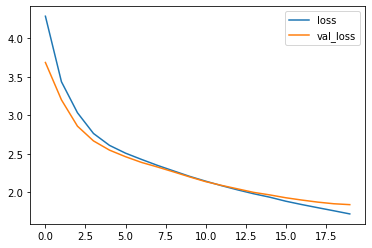

In [455]:
losses[['loss','val_loss']].plot()

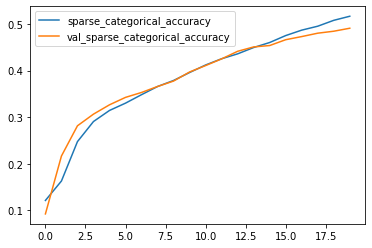

In [456]:
losses[['sparse_categorical_accuracy','val_sparse_categorical_accuracy']].plot()

# Making predictions

In the next cell, you implement a function to evaluate the model. Simply, you take the model as input and use model.prediction function to make predictions. 

In [457]:
#GRADED ASSIGNMENT
#Point = 4
#function to test the model and predict from the model given initial charachter
def test(model, text, char2idx, pred_char = 500):
    """
    test - function to take model and text as input and generate new text
    Inputs: model - text_generator_model
            text - input text string, starting first few character or words
            char2idx - output of generate_mappings function
            pred_char - integer, number of charachters want to be predicted, default is 500
    Returns: sequence of test generated
    Hints:   1 - convert input string into a list of characters and saved to "text_generated" variable for output. text_generated is the output of "test" function
             2 - read given text, convert text into numerical vectors, and expand dimension by using tf.expand_dims into shaep of [1, sequence_length, number_vocabs]
             3 - for-loop 'pred_char' times to predict the next 'pred_char' characters
             4 - use model.predict to predict the next characters.
             5 - Remove batch dimension using tf.squeeze. From [1, sequence_legnth, number_vocabs] -> [sequence_length, number_vocabs]
             6 - use tf.random.categorical to get the class of the next character (next character is the last character of the predicted sentence)
             7 - take the last character as input to the model. repeat step 1 that you need to expand dimenssion to [1, 1, number_vocabs]
             8 - add the predicted last character to text_generated
    """
    # YOUR CODE HERE
    # Converting our start string to numbers (vectorizing)
    input_eval = [char2idx[t] for t in text]
    input_eval = tf.expand_dims(input_eval, 0)
    # Empty string to store our results
    text_generated = []
    temperature = 1.0

    # Here batch size == 1
    #model.reset_states()
    for i in range(pred_char):
        predictions = model(input_eval)
        # remove the batch dimension
        predictions = tf.squeeze(predictions, 0)

        # using a categorical distribution to predict the character returned by the model
        predictions = predictions / temperature
        predicted_id = tf.random.categorical(predictions, num_samples=1)[-1,0].numpy()

        # Pass the predicted character as the next input to the model
        # along with the previous hidden state
        input_eval = tf.expand_dims([predicted_id], 0)

        text_generated.append(idx2char[predicted_id])

    return (text + ''.join(text_generated))
    raise NotImplementedError()

* So far, you have done good job in creating "test" function. However, the common mistake in "test" function is to forget reshaping text input to the shape [1, sequence_length] that 1 is one sample. Shape of "text" input is always [1, sequence_length]. To avoid this, I provide sample code 

```
text = 'I am President Trum' # given input
text =  tf.expand_dims[char2dix[c]f ro c in text], 0) # convert charactaer to integer and reshape to [1, sequence_length]

for i in range(5): # predict next 5 characters
  """
  * make predictions
  * add last_character of predicted sequence (the predicted character) to "text" input
  """
  
  last_character = predictions 
  text = tf.concate([text, last_character], axis = -1)
  text = text[:, 1:] # text input is 1 unit shifted-to-right of the concatenated input (as "text" is concatenated with last_character
```

* So far, you have done good job in creating "test" function. However, the common mistake in "test" function is to forget reshaping text input to the shape [1, sequence_length] that 1 is one sample. Shape of "text" input is always [1, sequence_length]. To avoid this, I provide sample code 

`text = 'I am President Trum' # given input
text =  tf.expand_dims[char2dix[c]f ro c in text], 0) # convert charactaer to integer and reshape to [1, sequence_length]
for i in range(5): # predict next 5 characters
  """
     make predictions
     add last_character of predicted sequence (the predicted character) to "text" input
  """
  last_character = predictions 
  text = tf.concate([text, last_character], axis = -1)
  text = text[:, 1:]`

In [458]:
np.random.seed(2020)
tf.random.set_seed(2020)

temp_model = text_generator_model(RNNcell_list, nodes_list, activation_list, len(vocabs), EMBEDDING_DIM, 1)
temp_model.compile(loss=SparseCategoricalCrossentropy(from_logits=True), optimizer=Adam(learning_rate = LEARNING_RATE), metrics=['sparse_categorical_accuracy'])
temp_model, temp_losses = load_weight_history(temp_model, model_weight_path, history_path)
pred = test(temp_model, "ROMEO: ", char2idx)

print("Predicted text: \n{}".format(''.join(pred)))

Predicted text: 
ROMEO: When will I come and reaving, iny, I'll sleer speak,
And theteset re but a briget.
LYIAL JULIET
Ty the frould the lidure: pair Pentul se, welcome, de.
What, lod there is well it rade ghinges bice:
The prien's deason, hovas, but my weed it, but Pelt!
Eidth you know's great poot kones;
Ksbloush her I have vilm me till tire.
Enter JULIET
A icong, I he pecicion his jay, if thou wo thit wat, no takes: well o' oje quiterly:
Marry, lest for you, slean sweed; you know is hend, it verce to the- crost spo


In [459]:
#YOU MUST NOT DELETE/EDIT THIS CELL.
#TEST CELL

Some words look reasonable and meaningful. Still, the text generation does not look well because of the small dataset (138283 characters only). To solve this, simply find a bigger dataset and train the model for more epochs.

# Congratulations !

Congratulation on completing this assignment. You now understand how language model work. You have implemented all the building blocks of a language model. Please submit this assignment. After submission you're encourange to play around with different arguments and see the changes it bring. You can also train your model from scratch.

# Happy Machine Learning :)